# Sentimental Review of the movie reviews

### by Karma Tsering
My goal is to predict sentiment of each movie reviews.

### Motivation of this project
There are too many movies and too many people with opnion on them. Its doubtful that any one would want to read these reviews, certly not companies that need to 

### Data Source
This dataset contains movie reviews along with their associated binary sentiment polarity labels. It is intended to serve as a benchmark for sentiment classification. 

The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). 

In the entire collection, no more than 30 reviews are allowed for any given movie because reviews for the same movie tend to have correlated ratings. In the labeled train/test sets, a negative review has a score <= 4 out of 10, and a positive review has a score >= 7 out of 10. Thus reviews with more neutral ratings are not included in the train/test sets.

In [1]:
import numpy as np
import pandas as pd
from os import listdir
%matplotlib inline

import spacy
nlp = spacy.load('en')

import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from os.path import isfile, join

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [23]:
#saves list of files names to loop though
neg_train_file_names = [f for f in listdir('aclImdb\\train\\neg') if isfile(join('aclImdb\\train\\neg', f))]
pos_train_file_names = [f for f in listdir('aclImdb\\train\\pos') if isfile(join('aclImdb\\train\\pos', f))]
neg_test_file_names = [f for f in listdir('aclImdb\\test\\neg') if isfile(join('aclImdb\\test\\neg', f))]
pos_test_file_names = [f for f in listdir('aclImdb\\test\\pos') if isfile(join('aclImdb\\test\\pos', f))]

In [24]:
#The reviews are saved in each individual files, so I looped through each file and saved the content of the files as 
#and assigned a sentement based on which folder the file was in (neg = 0/ pos = 1).
review_df1 = []
review_df2 = []
review_df3 = []
review_df4 = []

for file in neg_train_file_names:
    file1_open = open("aclImdb\\train\\neg\\{}".format(file), encoding="utf8")
    file1_content = file1_open.read()
    review_df1.append([file1_content, 0])
    
for file in pos_train_file_names:
    file1_open = open("aclImdb\\train\\pos\\{}".format(file), encoding="utf8")
    file1_content = file1_open.read()
    review_df2.append([file1_content, 1])

for file in neg_test_file_names:
    file1_open = open("aclImdb\\test\\neg\\{}".format(file), encoding="utf8")
    file1_content = file1_open.read()
    review_df3.append([file1_content, 0])

for file in pos_test_file_names:
    file1_open = open("aclImdb\\test\\pos\\{}".format(file), encoding="utf8")
    file1_content = file1_open.read()
    review_df4.append([file1_content, 1])

In [25]:
#Put them in DataFrame format
review_df1 = pd.DataFrame(review_df1)
review_df2 = pd.DataFrame(review_df2)
review_df3 = pd.DataFrame(review_df3)
review_df4 = pd.DataFrame(review_df4)

In [26]:
#put all the above dataframe in one dataframe
review_df = pd.concat([review_df1, review_df2, review_df3, review_df4]).sample(frac=1).reset_index(drop=True)
review_df.columns = ['Review', 'Rating']
print(review_df.shape)
review_df.head(10)

(50000, 2)


,Review,Rating
0,Tiny Tweet and Sly the sneak are locked up in ...,1
1,I will repeat - what a stupid scenario.<br /><...,0
2,"""The Second Coming Of Suzanne"" is yet another ...",0
3,Creating a comedy is like walking a pretty thi...,0
4,This series got me into Deighton's writing and...,1
5,"When I started watching the show I said ""Oh, n...",1
6,PLEASE TAKE A MINUTE TO READ MY ENTIRE REVIEW....,0
7,Where do I begin? Walt Disney's happiest motio...,1
8,For an indy film this is probably a bit better...,0
9,"Greetings, Moviegoers! As I watch Octopus II, ...",0


### Data Frame created above

# text file for making BOW
Put all the reviews in one string in perperation for extrating key words to be used as feature later on for creating vector.

### Pick 2000 words and make BOW

In [27]:
#I cleanded the text as much as possible so to reduce load for nlp processing and to increase the number of vocas for feature
from nltk.corpus import stopwords
stopWords = stopwords.words('english')
allwords = " "
list_of_review = []
Review = []
pattern = "[-*:!&$%',.\\?\"/<>()\d]"
pattern2 = r"\bbr\b"
pattern3 = r'\bA\b'
pattern4 = r'--'
#pattern5 = '.+;$'

for review in review_df['Review']:
    #cleaning up each review text by removing above patters
    mov_review = re.sub(pattern, "", review)
    mov_review = re.sub(pattern2, "", mov_review)
    mov_review = re.sub(pattern3, "", mov_review)
    mov_review = re.sub(pattern4, "", mov_review)
    #mov_review = re.sub(pattern5, "", mov_review)
    mov_review = mov_review.split()
    mov_review = [x for x in mov_review
                if not x == ' '
                and not x == 's'
                and not x == 'I'
                and not x == 'movie'
                and not x == '-PRON-'
                and not x == 'film'
                and not x == '\x96'
                and not x == '!'
                and x not in stopWords]

    #Collect all review as string to make BOW later
    #allwords = allwords + mov_review
    Onefull_review = ''
    for review_words in mov_review:
        Onefull_review = Onefull_review + ' ' + review_words
    list_of_review.append(Onefull_review)
    
    allwords = allwords + ' ' +' '.join(mov_review)

### Above the string text has been worked to reduce the nlp processing work below

In [ ]:
#nlp processing
#there seems to a limit of million char for nlp processing so I did it twice to get more feature
allwords_doc1 = nlp(allwords[0:999999])
allwords_doc2 = nlp(allwords[999999:1999998])

In [295]:
#Removing stop words help in creating meaningful features
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

#save only the words we care about
def bag_of_words(text):
    allwords = [token.lemma_
                    for token in text
                    if not token.is_punct
                    and not token.is_stop]
    allwords = [x for x in allwords
                if not x == ' '
                and not x == 's'
                and not x == 'movie'
                and not x == '-PRON-'
                and not x == 'film'
                and x not in stopWords]
   
    return allwords

#run both processed nlp text
word_count1 = [item[0] for item  in Counter(bag_of_words(allwords_doc1)).most_common(4000)]
word_count2 = [item[0] for item  in Counter(bag_of_words(allwords_doc2)).most_common(4000)]

#combaining both bag of words and removing duplicates
word_count = set(word_count1 + word_count2)

#### Create a df with word in the bag of words, make feature of them, and count how many there are in each review. Those count will be the data point.

In [347]:
def bow_features(review_df, word_count):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=word_count)
    df['text_sentence'] = review_df['Review'][0:20000]
    df['text_source'] = review_df['Rating'][0:20000]
    df.loc[:, word_count] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        sentence = nlp(sentence)
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in word_count
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [ ]:
#this takes too long so I only included 20,000 review. 
#word_counts = bow_features(review_df, word_count)
#word_counts
#I ran the above code and saved the file as 'Review_with_feature.csv'

In [2]:
#loading df from saved file
review_feature_df = pd.read_csv('Review_with_feature.csv', encoding="ISO-8859-1")
review_feature_df.head()

,Unnamed: 0,relevant,compare,uplift,campus,shrink,metal,farscape,earlier,ultimate,...,loud,flavor,arc,assassination,commentator,contract,charming,underground,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,WWII veterans return home and find it hard to ...,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,This is an incredible movie that begins slowly...,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,It worked! Director Christian Duguay created a...,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Spin-offs, for somebody who don't know, are no...",1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,...about this film was the title song. After 3...,0


In [10]:
#split the dataset into train and test sets, with test size of 40% becasue it gives me better result
X = review_feature_df.drop(['text_sentence', 'text_source', 'Unnamed: 0'], 1)
y = review_feature_df['text_source']

X_train.head()

,relevant,compare,uplift,campus,shrink,metal,farscape,earlier,ultimate,vulnerable,...,wild,primarily,loud,flavor,arc,assassination,commentator,contract,charming,underground
16152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17768,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6666,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [11]:
X_norm = normalize(X)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_pca, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)

In [12]:
.explained_variance_ratio_

AttributeError: type object 'PCA' has no attribute 'explained_variance_ratio_'

## Creating clusters
### K-Mean

In [6]:
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

KMean = KMeans(n_clusters=2, random_state=42)
KMean.fit(X_train)

y_pred = KMean.predict(X_train)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))
print(classification_report(y_pred, y_train))

Comparing k-means clusters against the data:
text_source     0     1
row_0                  
0            1257  1243
1            6211  6289
             precision    recall  f1-score   support

          0       0.17      0.50      0.25      2500
          1       0.83      0.50      0.63     12500

avg / total       0.72      0.50      0.57     15000



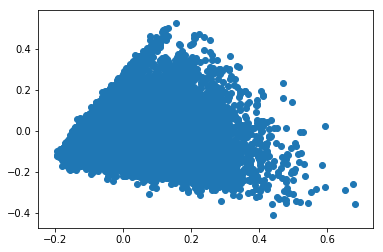

In [9]:
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

Applying pca does not seem to improve the result therefore I left it out. These result are not that good.

In [396]:
#y_pred1 = KMean1.predict(X_test_pca)
y_pred2 = KMean2.predict(X_test)

print('Comparing k-means clusters against the data:')
#print(pd.crosstab(y_pred1, y_test))
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y_test))

Comparing k-means clusters against the data:
Comparing k-means clusters against the data:
text_source     0     1
row_0                  
0             656   699
1            3345  3300


I get a similer result for test set. The model can't predict well but it is overfitting either.

# GradientBoosting

In [6]:
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

Training set score: 0.8171666666666667

Test set score: 0.78925


This result seems the best and does not seem to have overfitting.

# BoW with Logistic Regression

In [350]:
#First trying some classicication models starting with logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)

print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

y_pred = lr.predict(X_train)
pd.crosstab(y_train, y_pred)

(12000, 5049) (12000,)
Training set score: 0.98375

Test set score: 0.84275


col_0,0,1
text_source,,
0,5887,112
1,83,5918


In [351]:
y_pred = lr.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
text_source,,
0,3383,618
1,640,3359


This model has higher predictivity but suffers form large overfitting

# Random forest

In [352]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier()

train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

y_pred = rfc.predict(X_train)
pd.crosstab(y_train, y_pred)

Training set score: 0.9933333333333333

Test set score: 0.75725


col_0,0,1
text_source,,
0,5991,8
1,72,5929


In [353]:
y_pred = rfc.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
text_source,,
0,3300,701
1,1241,2758


Too large a overfitting to be any good.

# GradientBoosting

In [354]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

Training set score: 0.8171666666666667

Test set score: 0.78925


This gives me very smiler result as minibatchkmeans model

# SVM

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
y_pred1 = svm.predict(X_train)
print(pd.crosstab(y_train, y_pred1))

#print('\nTest set score:', svm.score(X_test, y_test))
#y_pred2 = svm.predict(X_test)
#pd.crosstab(y_test, y_pred2)

Training set score: 0.66725
col_0           0     1
text_source            
0            3861  2138
1            1855  4146


In [10]:
from sklearn.metrics iport classification_report, confusion_matrix
print(classification_report(y_train, y_pred1))

             precision    recall  f1-score   support

          0       0.68      0.64      0.66      5999
          1       0.66      0.69      0.67      6001

avg / total       0.67      0.67      0.67     12000



In [27]:
from sklearn.svm import SVC

svm = SVC(C=10, gamma=1, kernel='linear')
svm.fit(X_train, y_train)

print('Training set score:', svm.score(X_train, y_train))
y_pred1 = svm.predict(X_train)
print(pd.crosstab(y_train, y_pred1))

#print('\nTest set score:', svm.score(X_test, y_test))
#y_pred2 = svm.predict(X_test)
#pd.crosstab(y_test, y_pred2)

Training set score: 0.6660833333333334
col_0           0     1
text_source            
0            3798  2201
1            1806  4195


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_pred1))
print('\n Testing set score:')
y_pred2 = svm.predict(X_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.68      0.63      0.65      5999
          1       0.66      0.70      0.68      6001

avg / total       0.67      0.67      0.67     12000


 Testing set score:
             precision    recall  f1-score   support

          0       0.67      0.63      0.65      4001
          1       0.65      0.69      0.67      3999

avg / total       0.66      0.66      0.66      8000



Using GridSearchCV from sklearn to find the optimal parameters for C, gamma and kernel from a given set of values to improve our accuracy.

In [17]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear']}

In [18]:
from sklearn.svm import SVC
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [19]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   7.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   3.6s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............................ C=1, gamma=1, kernel=linear -   4.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -   7.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -   3.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .......................... C=1, gamma=0.1, kernel=linear -   4.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ........................ C=1, gamma=0.001, kernel=linear -   6.9s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ........................ C=1, gamma=0.001, kernel=linear -   3.7s
[CV] C

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 81.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [20]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [24]:
#This was attempt on subsection of the dataset to reduce load but the parameter found did not improve prediction
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = grid.predict(X_train)
print(classification_report(y_train, y_pred1))

             precision    recall  f1-score   support

          0       0.51      0.52      0.51      5999
          1       0.51      0.50      0.51      6001

avg / total       0.51      0.51      0.51     12000



In [ ]:
y_pred1 = grid.predict(X_test)
print(classification_report(y_test, y_pred1))
print(pd.crosstab(y_test, y_pred1))

# K-Mean using Inverse Document Frequency and Term-frequency weights (tfidf) vectorization.

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(list_of_review[0:5000], review_df['Rating'][0:5000], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
list_of_review_tfidf=vectorizer.fit_transform(list_of_review[0:5000])
print("Number of features: %d" % list_of_review_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(list_of_review_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()


Number of features: 23051


In [98]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(10000)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

Percent variance captured by all components: 100.00000000000004


In [127]:
from sklearn.cluster import KMeans
KMean = KMeans(n_clusters=2, random_state=42)
KMean.fit(X_train_lsa)

y_pred = KMean.predict(X_train_lsa)


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

Comparing k-means clusters against the data:
Rating    0     1
row_0            
0       835   278
1       652  1235


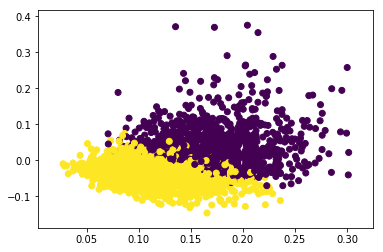

In [132]:
lsa_df = pd.DataFrame(X_train_lsa)
# Plot the solution.
plt.scatter(X_train_lsa[:, 0], X_train_lsa[:, 1], c=y_pred)
plt.show()

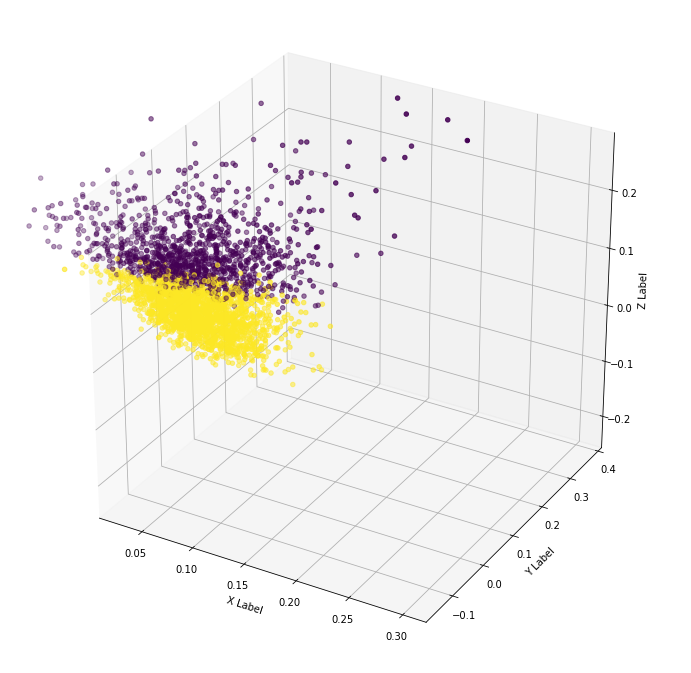

In [126]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_lsa[:, 0], X_train_lsa[:, 1], X_train_lsa[:, 2], c=y_pred, zdir='x')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [135]:
from sklearn.cluster import MiniBatchKMeans
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_train_lsa)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_train_lsa)

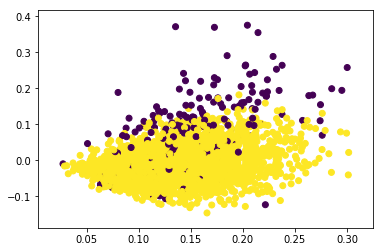

In [136]:
# Plot the solution.
plt.scatter(X_train_lsa[:, 0], X_train_lsa[:, 1], c=predict_mini)
plt.show()

# GradientBoosting

In [137]:
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train_lsa, predict_mini)

y_pred = clf.predict(X_train_lsa)


# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, predict_mini))

Comparing k-means clusters against the data:
col_0    0     1
row_0           
0      135     1
1       94  2770


In [139]:
X_test_tfidf_csr = X_test_tfidf.tocsr()

print('Training set score:', clf.score(X_train_lsa, predict_mini))
#print('\nTest set score:', clf.score(X_test_tfidf_csr, y_test))

Training set score: 0.9683333333333334
